In [1]:
#Importing the necessary datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Loading the dataset

df = pd.read_csv('D:\\DataScience\\Term 1\\8.IML\\1.Assignments\\1.Assigment for midterm\\34 Challa Vighnesh_DataSets_input\\bikes.csv')

In [3]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [4]:
df.tail()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000
7856,Bajaj Pulsar 220cc 2016,2016,15000 Km,first owner,chennai,\n\n 38 kmpl,21 bhp,65000


In [5]:
#Observations

#The model is combined with the brand and presented in the single coloumn
#In kms_driven there is absurd data related to the mileage
#the mileage columns is alpha numeric with \n s and similar pattern observed with the power.

In [6]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [7]:
#Observations

#The columns kms_driven,mileage,power can be expressed as numeric for better training

In [8]:
#Extracting the brand from model_name columns

df['brand'] = df['model_name'].str.split(' ',n=-1,expand = True)[0]

In [9]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa


In [10]:
#extracting the power from alpha numeric power columns

df['power']=df['power'].str.split(' ',n=-1,expand = True)[0]

In [11]:
#Converting to numeric
df['power'] = pd.to_numeric(df['power'],errors = 'coerce')

In [12]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19.0,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.8,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28.0,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.5,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30.0,197500,Jawa


In [13]:
#Cleaning the mileage columns

df['mileage'] = df['mileage'].str.split(' ',n=-1,expand = True)[1]

In [14]:
#Converting to numeric column

df['mileage'] = pd.to_numeric(df['mileage'],errors = 'coerce')

In [15]:
#Cleaning the kms_driven column

df['kms_driven'] = df['kms_driven'].str.split(' ',expand = True,n=-1)[0]

In [16]:
#Converting into numeric column

df['kms_driven'] = pd.to_numeric(df['kms_driven'],errors = 'coerce')

In [17]:
df.dtypes

model_name     object
model_year      int64
kms_driven    float64
owner          object
location       object
mileage       float64
power         float64
price           int64
brand          object
dtype: object

In [18]:
#Calculating the age of the model

df['model_elapsed_years'] = 2023-df['model_year']

In [19]:
#Dropping irrelavant columns

df = df.drop(['model_name','location','model_year'],axis = 1)

In [20]:
df.head()

,kms_driven,owner,mileage,power,price,brand,model_elapsed_years
0,17000.0,first owner,35.0,19.0,63500,Bajaj,6
1,50000.0,first owner,35.0,19.8,115000,Royal,7
2,14795.0,first owner,30.0,28.0,300000,Hyosung,11
3,NaN,first owner,28.0,34.5,100000,Bajaj,6
4,2000.0,first owner,NaN,30.0,197500,Jawa,3


In [21]:
#Shape

df.shape

(7857, 7)

In [22]:
#The row to column count is healthier

In [23]:
#Value_count analysis of categorical columns

df['owner'].value_counts()

owner
first owner             6817
second owner             833
third owner              134
fourth owner or more      73
Name: count, dtype: int64

In [24]:
df['brand'].value_counts()

brand
Bajaj               2104
Royal               1750
Hero                 808
Yamaha               747
TVS                  567
Honda                530
KTM                  491
Suzuki               223
Harley-Davidson      171
UM                   128
Kawasaki              67
Hyosung               54
Benelli               53
Jawa                  46
Triumph               36
Mahindra              27
Ducati                16
Husqvarna             11
BMW                   10
BenelliImperiale       6
MV                     2
Aprilia                2
Fb                     2
Yazdi                  1
                       1
Indian                 1
Moto                   1
Ideal                  1
yamaha                 1
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kms_driven           5869 non-null   float64
 1   owner                7857 non-null   object 
 2   mileage              6735 non-null   float64
 3   power                7688 non-null   float64
 4   price                7857 non-null   int64  
 5   brand                7857 non-null   object 
 6   model_elapsed_years  7857 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 429.8+ KB


In [26]:
#There are null values in kms_driven,mileage,power columns

In [27]:
df.describe()

,kms_driven,mileage,power,price,model_elapsed_years
count,5869.000000,6735.000000,7688.000000,7.857000e+03,7857.000000
mean,23090.124723,44.662457,20.934489,1.067913e+05,7.632302
std,28710.628053,17.046864,15.054799,1.389261e+05,4.001443
min,0.000000,5.000000,6.100000,0.000000e+00,2.000000
25%,8903.000000,35.000000,14.000000,4.200000e+04,5.000000
50%,17000.000000,40.000000,19.000000,7.500000e+04,7.000000
75%,30000.000000,57.000000,24.160000,1.250000e+05,9.000000
max,1000000.000000,104.000000,197.300000,3.000000e+06,73.000000


In [28]:
#There are outliers in kms_driven,mileage,power,price,elapsed years

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


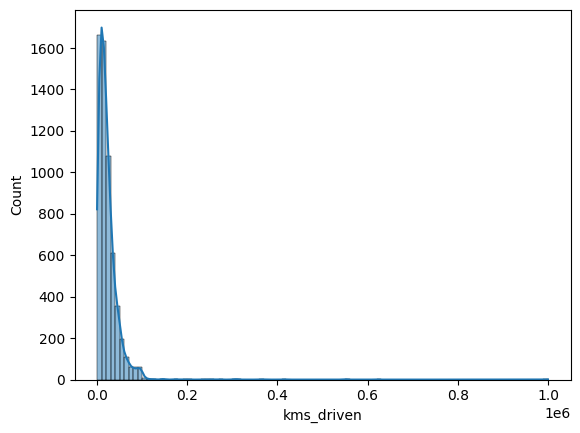

In [29]:
#Univariate analysis

sns.histplot(df['kms_driven'],bins = 100,kde = True)
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


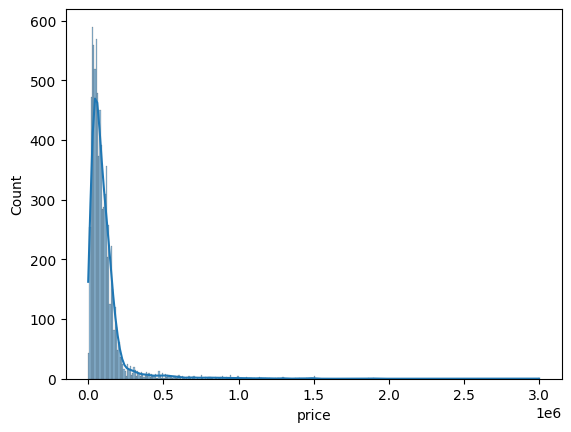

In [30]:
#Univariate analysis on price

sns.histplot(df['price'],kde = True)
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


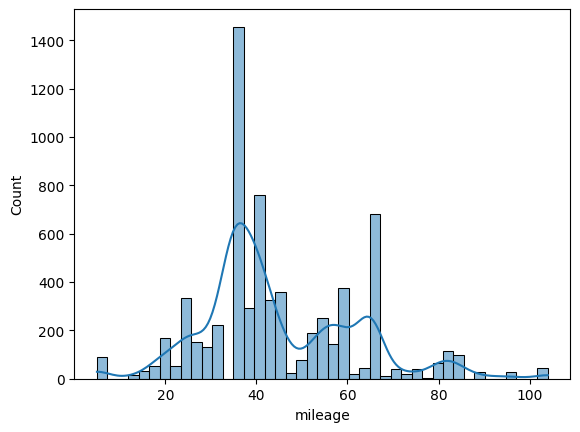

In [31]:
#Univariate analysis on price

sns.histplot(df['mileage'],kde = True)
plt.show()

In [32]:
#The distribution is right skewed.

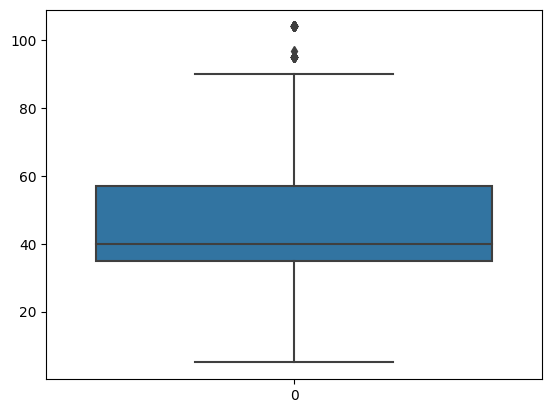

In [33]:
sns.boxplot(df['mileage'])
plt.show()

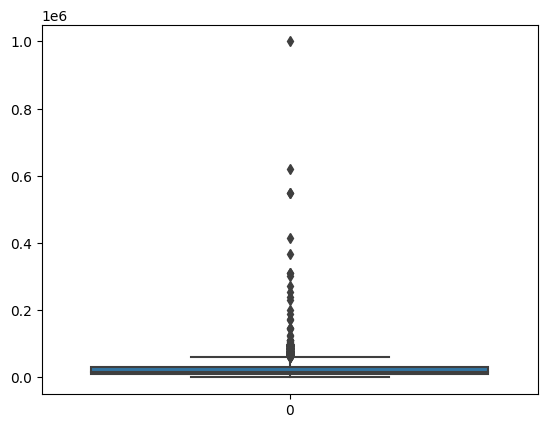

In [34]:
sns.boxplot(df['kms_driven'])
plt.show()

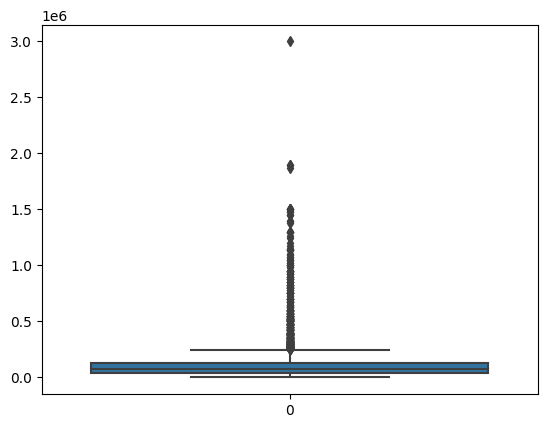

In [35]:
sns.boxplot(df['price'])
plt.show()

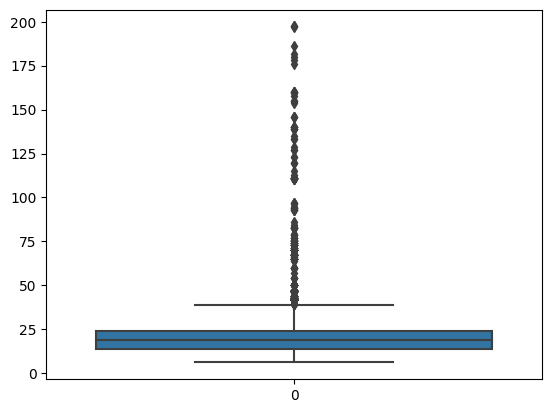

In [36]:
sns.boxplot(df['power'])
plt.show()

In [37]:
#There are ouliers in the 4 numerical columns

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

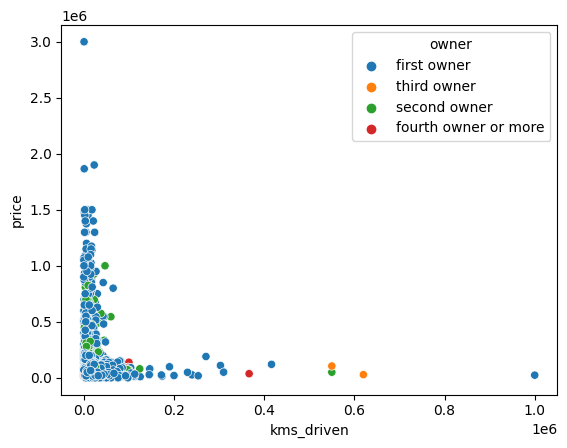

In [38]:
#Bivariate analysis

sns.scatterplot(data = df,x = df['kms_driven'],y = df['price'],hue = 'owner')
plt.show()

In [39]:
#The price of the bikes are more for less kms_driven and first owner

<Axes: xlabel='owner'>

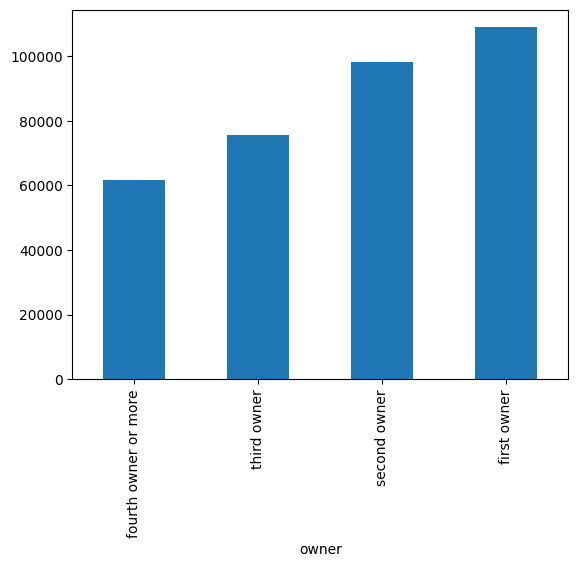

In [40]:
#lets check the average price by owner

df['price'].groupby(df['owner']).mean().sort_values().plot(kind = 'bar')

In [41]:
#The average price of the bike goes down as the owners increases

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


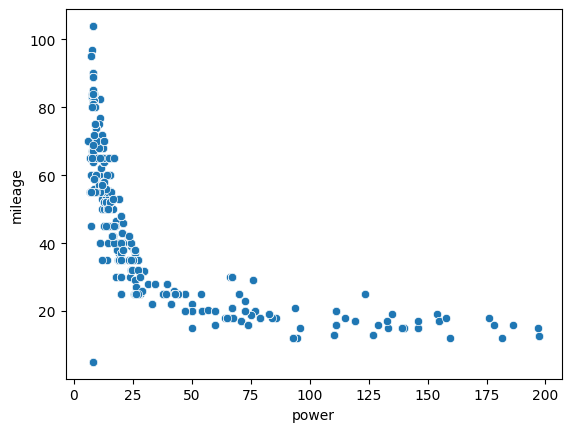

In [42]:
#Bivariate analysis on the mileage and power

sns.scatterplot(data = df,y = 'mileage',x = 'power')
plt.show()

In [43]:
#As the power increases the mileage drops - Negative Correlation

In [44]:
df.select_dtypes('number').corr()

,kms_driven,mileage,power,price,model_elapsed_years
kms_driven,1.000000,0.144141,-0.148264,-0.199200,0.322147
mileage,0.144141,1.000000,-0.554302,-0.464452,0.163578
power,-0.148264,-0.554302,1.000000,0.833983,-0.145213
price,-0.199200,-0.464452,0.833983,1.000000,-0.227963
model_elapsed_years,0.322147,0.163578,-0.145213,-0.227963,1.000000


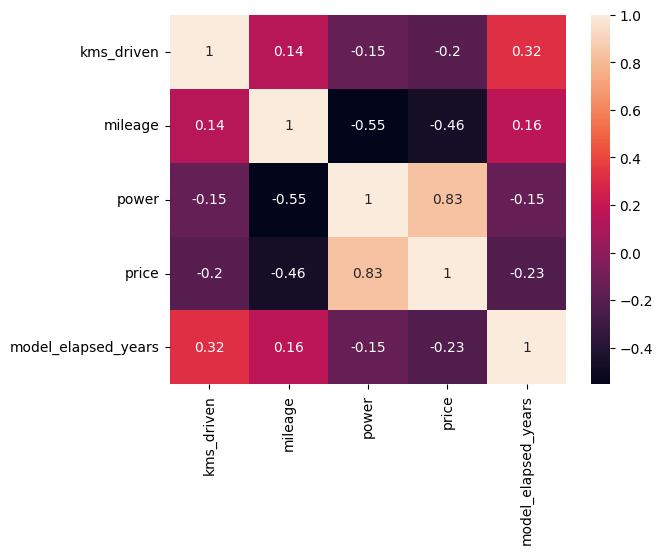

In [45]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.show()

In [46]:
#There is a strong correlation between power and price

In [47]:
#Data Cleaning

In [48]:
df = df.dropna()

In [49]:
df_num = df.select_dtypes(include = 'number')

In [50]:
#Oulier filter

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [51]:
lower_bound

kms_driven            -21006.2500
mileage                   15.5000
power                     -0.5875
price                 -87750.0000
model_elapsed_years       -1.0000
dtype: float64

In [52]:
upper_bound

kms_driven              60603.7500
mileage                    67.5000
power                      39.7125
price                  266250.0000
model_elapsed_years        15.0000
dtype: float64

In [53]:
df = df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

In [54]:
df

,kms_driven,owner,mileage,power,price,brand,model_elapsed_years
0,17000.0,first owner,35.0,19.0,63500,Bajaj,6
1,50000.0,first owner,35.0,19.8,115000,Royal,7
5,24561.0,third owner,35.0,25.0,63400,KTM,11
6,19718.0,first owner,65.0,17.0,55000,Bajaj,7
10,25000.0,first owner,35.0,19.8,136900,Royal,5
...,...,...,...,...,...,...,...
7847,23000.0,first owner,35.0,19.8,120000,Royal,7
7852,7000.0,first owner,42.0,16.0,55000,Yamaha,12
7854,6407.0,first owner,65.0,17.0,61740,Bajaj,7
7855,7524.0,first owner,57.0,11.8,49000,Bajaj,7


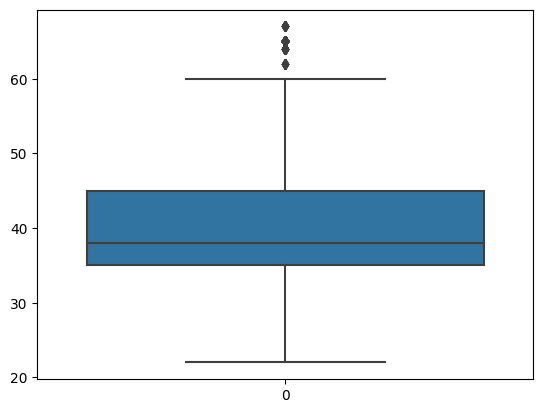

In [55]:
sns.boxplot(df['mileage'])
plt.show()

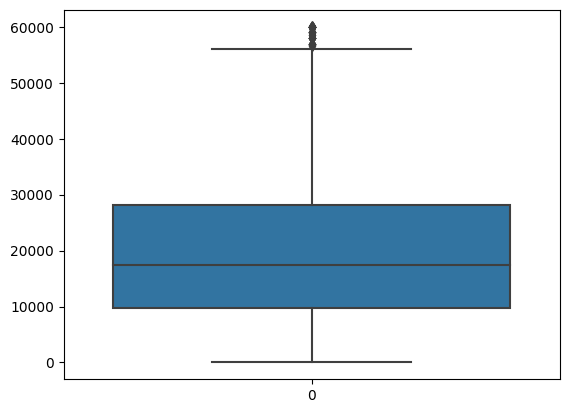

In [56]:
sns.boxplot(df['kms_driven'])
plt.show()

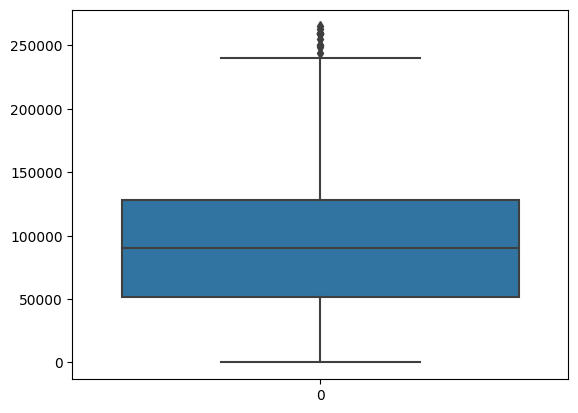

In [57]:
sns.boxplot(df['price'])
plt.show()

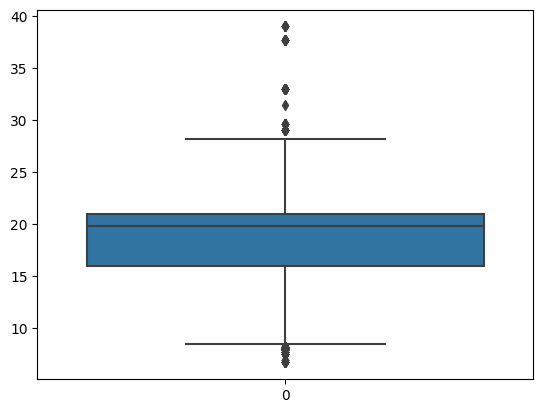

In [58]:
sns.boxplot(df['power'])
plt.show()

In [59]:
y = df['price']
X = df.drop('price',axis = 1)

In [60]:
X_num = X.select_dtypes(include = 'number')
X_cat = X.select_dtypes(include = 'object')

In [61]:
X_num.head()

,kms_driven,mileage,power,model_elapsed_years
0,17000.0,35.0,19.0,6
1,50000.0,35.0,19.8,7
5,24561.0,35.0,25.0,11
6,19718.0,65.0,17.0,7
10,25000.0,35.0,19.8,5


In [62]:
X_cat.head()

,owner,brand
0,first owner,Bajaj
1,first owner,Royal
5,third owner,KTM
6,first owner,Bajaj
10,first owner,Royal


In [63]:
X_num_scaled = MinMaxScaler().fit_transform(X_num)

In [64]:
X_num_scaled = pd.DataFrame(X_num_scaled,columns = X_num.columns,index = X_num.index)

In [65]:
X_num_scaled.head()

,kms_driven,mileage,power,model_elapsed_years
0,0.283074,0.288889,0.380421,0.307692
1,0.832570,0.288889,0.405204,0.384615
5,0.408975,0.288889,0.566295,0.692308
6,0.328332,0.955556,0.318463,0.384615
10,0.416285,0.288889,0.405204,0.230769


In [66]:
X_cat_encoded = pd.get_dummies(X_cat,drop_first = False,dtype=int)

In [67]:
X_cat_encoded.head()

,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner,brand_,brand_Bajaj,brand_Benelli,brand_BenelliImperiale,brand_Hero,brand_Honda,brand_Husqvarna,brand_Hyosung,brand_KTM,brand_Kawasaki,brand_Mahindra,brand_Royal,brand_Suzuki,brand_TVS,brand_UM,brand_Yamaha
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [68]:
X = pd.concat([X_num_scaled,X_cat_encoded],axis = 1)

In [69]:
X.head()

,kms_driven,mileage,power,model_elapsed_years,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner,brand_,brand_Bajaj,...,brand_Husqvarna,brand_Hyosung,brand_KTM,brand_Kawasaki,brand_Mahindra,brand_Royal,brand_Suzuki,brand_TVS,brand_UM,brand_Yamaha
0,0.283074,0.288889,0.380421,0.307692,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.832570,0.288889,0.405204,0.384615,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.408975,0.288889,0.566295,0.692308,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.328332,0.955556,0.318463,0.384615,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0.416285,0.288889,0.405204,0.230769,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2896, 24), (724, 24), (2896,), (724,))

In [87]:
#knn modeling
k_values = np.arange(1,22,2)
train_mape_values = []
test_mape_values = []
cv_mape_values = []

In [88]:
k_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [89]:
for i in k_values:
    
    #Training the model
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train,y_train)
    
    #Predicting the y_hat_train and measuring the error
    pred_y_train = model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred_y_train)
    train_mape_values.append(error_train)
    
    #Predicting the y_hat_test and measuring the error
    pred_y_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_y_test)
    test_mape_values.append(error_test)
    
    #CV values
    cv_values = -cross_val_score(model,X,y,cv = 5,scoring = 'neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_values)
    cv_mape_values.append(cv_mape)

In [75]:
for i in k_values:
    #Training the dataset on the X_train and y_train
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train,y_train)
    
    #Predicting the y_train and cal the error
    pred_train = model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred_train)
    train_mape_values.append(error_train)
    
    #Predicting the y_test values using the X_test and cal the error
    pred_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_test)
    test_mape_values.append(error_test)
    
    #using CV calues
    cv_scores = -cross_val_score(model,X,y,cv = 5,scoring = 'neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_values.append(cv_mape)

In [90]:
train_mape_values


[0.012868783666178267,
 4.754568522351094e+17,
 5.981312152894068e+17,
 6.28829982599419e+17,
 6.382919405576538e+17,
 6.674472911212207e+17,
 6.845903275790117e+17,
 6.866908111663729e+17,
 6.851786096470341e+17,
 6.81516233251978e+17,
 6.869897774320863e+17]

In [91]:
test_mape_values

[0.2054630248400102,
 0.1760180869805239,
 0.1677628511268936,
 0.17022131662781237,
 0.17257931857818296,
 0.1747991438785906,
 0.1763279151146808,
 0.1772919676548118,
 0.17882395924126776,
 0.18123769029443404,
 0.1834412693556475]

In [92]:

cv_mape_values

[5.573515560944703e+17,
 5.696265606036937e+17,
 5.92293019943732e+17,
 6.03530336330448e+17,
 5.999570185361293e+17,
 6.133826916191566e+17,
 6.107939526756014e+17,
 6.013460016477236e+17,
 5.937650691232015e+17,
 5.909093318465294e+17,
 5.837115950973298e+17]

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

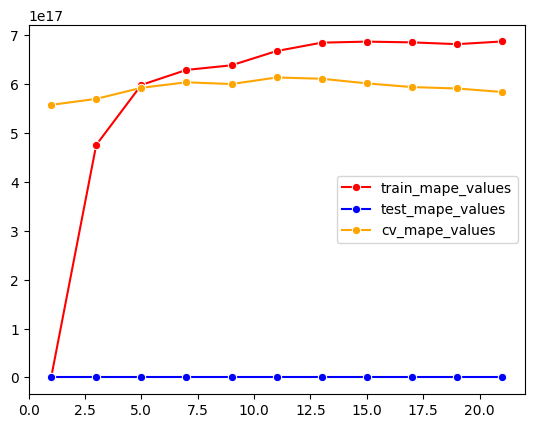

The best k_value:  1


In [93]:
sns.lineplot(x = k_values,y = train_mape_values,marker = 'o',color = 'Red',label = 'train_mape_values')
sns.lineplot(x = k_values,y = test_mape_values,marker = 'o',color = 'Blue',label = 'test_mape_values')
sns.lineplot(x = k_values,y = cv_mape_values,marker = 'o',color = 'Orange',label = 'cv_mape_values')

plt.show()

#best_cv_value_is
best_k_cv = k_values[np.argmin(cv_mape_values)]
print("The best k_value: ",best_k_cv)